<a href="https://colab.research.google.com/github/Razzf/MachineLearningTests/blob/master/car_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("/content/car.data")
print(data)

     buying  maint   door persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


In [12]:
le = preprocessing.LabelEncoder()
print(data['buying'])
buying = le.fit_transform(list(data["buying"]))
maint = le.fit_transform(list(data["maint"]))
door = le.fit_transform(list(data["door"]))
persons = le.fit_transform(list(data["persons"]))
lug_boot = le.fit_transform(list(data["lug_boot"]))
safety = le.fit_transform(list(data["safety"]))
cls = le.fit_transform(list(data["class"]))


0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: buying, Length: 1728, dtype: object


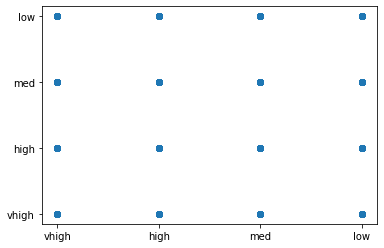

In [13]:
#data preview
data_to_show = data[["buying", "maint"]]
plt.scatter(data['buying'], data['maint'])
plt.show()

In [14]:
x = list(zip(buying, maint, door, persons, lug_boot, safety))
y = list(cls)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size = .1)
print(x_train)

[(2, 3, 3, 0, 2, 1), (3, 0, 2, 0, 0, 2), (0, 3, 3, 2, 2, 1), (2, 2, 3, 0, 0, 1), (2, 0, 0, 2, 1, 1), (1, 1, 0, 2, 1, 1), (3, 3, 2, 0, 1, 0), (0, 3, 1, 1, 0, 0), (2, 3, 3, 0, 0, 0), (2, 2, 0, 2, 2, 1), (2, 0, 2, 0, 0, 2), (0, 0, 1, 0, 2, 2), (3, 0, 3, 2, 0, 1), (2, 0, 2, 1, 1, 1), (0, 1, 2, 0, 2, 2), (3, 0, 3, 2, 0, 0), (2, 0, 3, 0, 1, 0), (3, 3, 2, 0, 2, 0), (3, 2, 2, 1, 0, 2), (0, 1, 2, 0, 0, 2), (2, 1, 0, 1, 2, 0), (0, 1, 2, 2, 2, 1), (1, 0, 3, 2, 1, 1), (3, 3, 0, 1, 1, 2), (3, 3, 0, 1, 2, 1), (1, 1, 3, 0, 0, 2), (2, 1, 2, 2, 2, 2), (2, 2, 0, 0, 2, 2), (3, 0, 0, 0, 0, 1), (2, 3, 1, 0, 2, 0), (1, 2, 0, 2, 1, 2), (3, 0, 1, 2, 0, 2), (1, 0, 1, 2, 0, 0), (1, 1, 3, 0, 0, 0), (0, 1, 3, 2, 0, 1), (3, 0, 3, 1, 2, 1), (2, 0, 2, 0, 1, 0), (3, 0, 1, 0, 2, 0), (2, 3, 1, 2, 2, 2), (3, 2, 3, 1, 2, 2), (1, 0, 3, 0, 1, 1), (0, 2, 3, 2, 1, 2), (0, 2, 3, 1, 2, 2), (0, 0, 1, 2, 1, 0), (2, 0, 1, 0, 0, 2), (3, 1, 2, 2, 1, 0), (1, 2, 1, 0, 2, 1), (0, 1, 0, 2, 1, 1), (1, 1, 0, 1, 1, 1), (1, 3, 2, 0, 1, 1),

In [15]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
print(acc)

0.9075144508670521


In [16]:
names = ["unacc", "acc", "good", "vgood"]

predictions = model.predict(x_test)

for i in range(len(predictions)):
  print("prediction: ", names[predictions[i]], "data: ", x_test[i], "Actual Result: ", names[y_test[i]])

prediction:  good data:  (3, 0, 2, 1, 2, 1) Actual Result:  good
prediction:  good data:  (3, 2, 0, 0, 1, 0) Actual Result:  good
prediction:  good data:  (1, 1, 2, 1, 2, 0) Actual Result:  acc
prediction:  good data:  (2, 0, 0, 1, 1, 2) Actual Result:  good
prediction:  good data:  (2, 3, 3, 2, 0, 1) Actual Result:  good
prediction:  good data:  (1, 0, 0, 0, 1, 0) Actual Result:  good
prediction:  good data:  (2, 3, 0, 2, 1, 1) Actual Result:  good
prediction:  unacc data:  (2, 0, 3, 1, 0, 0) Actual Result:  unacc
prediction:  good data:  (0, 0, 0, 0, 0, 1) Actual Result:  good
prediction:  good data:  (2, 1, 2, 1, 0, 1) Actual Result:  good
prediction:  good data:  (2, 0, 2, 0, 2, 2) Actual Result:  good
prediction:  good data:  (0, 1, 3, 0, 0, 1) Actual Result:  good
prediction:  unacc data:  (0, 1, 2, 1, 1, 0) Actual Result:  unacc
prediction:  good data:  (0, 1, 2, 0, 1, 2) Actual Result:  good
prediction:  unacc data:  (1, 0, 2, 1, 1, 0) Actual Result:  vgood
prediction:  good da